Набор данных Cars с характеристиками, включающими марку, модель, год выпуска, двигатель и другие свойства автомобиля, используется для прогнозирования его цены. Датасет был взят с сайта www.kaggle.com.
В датасете есть числове и тестовые данные.
В датасете представлены следующие атрибуты:
Make 
Model - модель машины
Year - год выпуска машины
Engine Fuel Type - тип топлива двигателя
Engine HP - Мощность двигателя
Engine Cylinders - цилиндры двигателя
Transmission Type - тип трансмиссии
Driven Wheels - Приводимые колеса 
Number of Doors - Количество дверей
Market Category - Категория автомобиля
Vehicle Size - Размер автомобиля
Vehicle Style - Стиль автомобиля
highway MPG - расход на дном галоне топлива
city mpg - Расход топлива по городу
Popularity - популярность автомобиля
MSRP - рекомендованная производителем розничная цена в долларах


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
values1 = 1.1
values2 = 100
df['Engine Cylinders'] = df['Engine Cylinders'].fillna(value=values1)
df['Engine HP'] = df['Engine HP'].fillna(value=values2)
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11914 non-null  float64
 5   Engine Cylinders   11914 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [4]:
def findOutliers(arr, outliers):
  sorted = np.sort(arr)
  iqr = np.ceil(75/100*len(sorted))-np.ceil(25/100*len(sorted))

  threshold1 = sorted[int(np.ceil(25/100*len(sorted)))]-1.5*sorted[int(iqr)]
  threshold2 = sorted[int(np.ceil(75/100*len(sorted)))]+1.5*sorted[int(iqr)]

  i = 0
  while sorted[i] < threshold1:
    outliers.append(sorted[i])
    i += 1

  i = -1
  while threshold2 < sorted[i]:
    outliers.append(sorted[i])
    i -= 1

  return outliers

Год выпуска авто

Среднее значение: 2010.384337753903
СКО: 7.579421778692508
Пропущенные значения: 0
Выбросы: 
[]


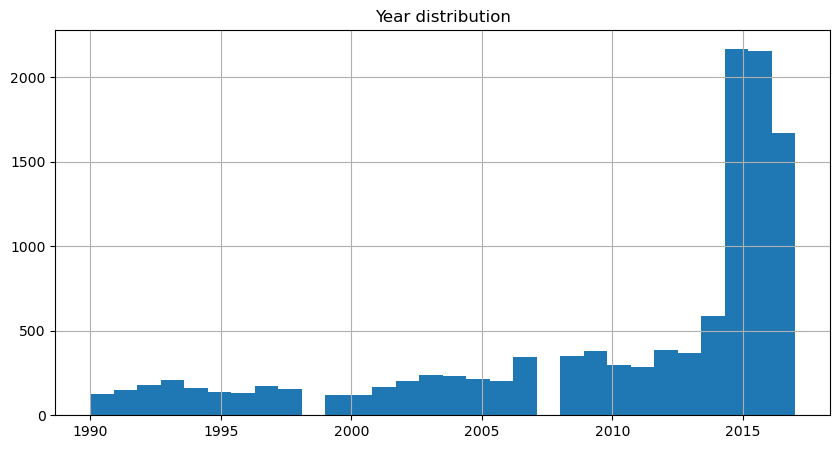

In [6]:
year = np.array(df['Year'])
yearMean = year.mean()
print('Среднее значение: ' + str(yearMean))

yearSKO = np.std(year)
print('СКО: ' + str(yearSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Year'], bins=30);
plt.grid(True)
plt.title('Year distribution')

print('Пропущенные значения: ' + str(df['Year'].isna().sum()))

yOutliers = []

print('Выбросы: ')
print(findOutliers(year, yOutliers))

Расход топлива в городе city mpg

Среднее значение: 19.73325499412456
СКО: 8.987420957564412
Пропущенные значения: 0
Выбросы: 
[137, 137, 137, 132, 132, 129, 128, 128, 128, 128, 128, 128, 128, 128, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 126, 124, 124, 122, 121, 121, 121, 120, 120, 120, 120, 120, 110, 110, 110, 102, 101, 101, 101, 101, 98, 97, 95, 94, 94, 92, 91, 89, 88, 88, 88, 88, 86, 85, 85, 85, 78, 78, 78, 58, 58, 55, 55, 55, 54, 54, 54, 54, 54, 54, 54, 54, 54, 54, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 53, 51, 51, 51, 51, 51, 51, 50, 50, 50, 50, 50, 50]


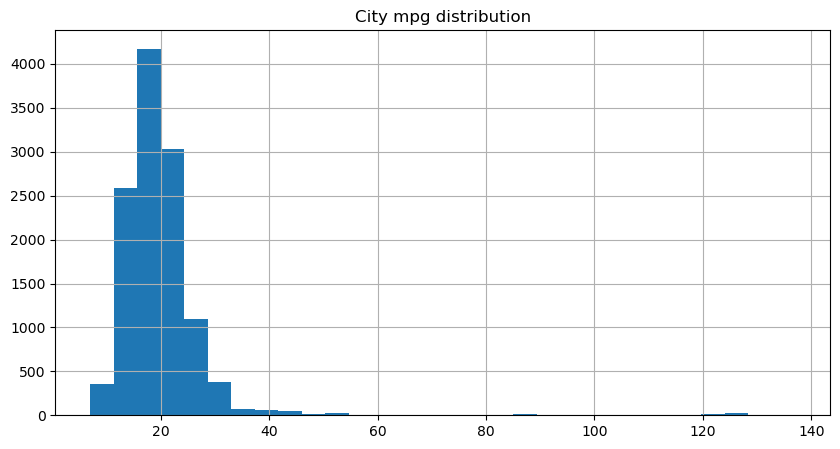

In [8]:
mpg = np.array(df['city mpg'])
mpgMean = mpg.mean()
print('Среднее значение: ' + str(mpgMean))

mpgSKO = np.std(mpg)
print('СКО: ' + str(mpgSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['city mpg'], bins=30);
plt.grid(True)
plt.title('Сity mpg distribution')

print('Пропущенные значения: ' + str(df['city mpg'].isna().sum()))

mpgOutliers = []

print('Выбросы: ')
print(findOutliers(mpg, mpgOutliers))

Мошность двигателя Engine HP

Среднее значение: 248.52089978176934
СКО: 109.45916278505743
Пропущенные значения: 0
Выбросы: 
[1001.0, 1001.0, 1001.0, 750.0, 750.0, 731.0, 731.0, 731.0, 720.0, 720.0, 720.0, 720.0, 707.0, 707.0, 707.0, 707.0, 707.0, 707.0, 700.0, 700.0, 700.0, 700.0, 700.0, 700.0, 670.0, 662.0, 662.0, 662.0, 662.0, 661.0, 660.0, 651.0, 651.0, 651.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 650.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 645.0, 641.0, 641.0, 641.0, 640.0, 640.0, 640.0, 640.0, 640.0, 640.0]


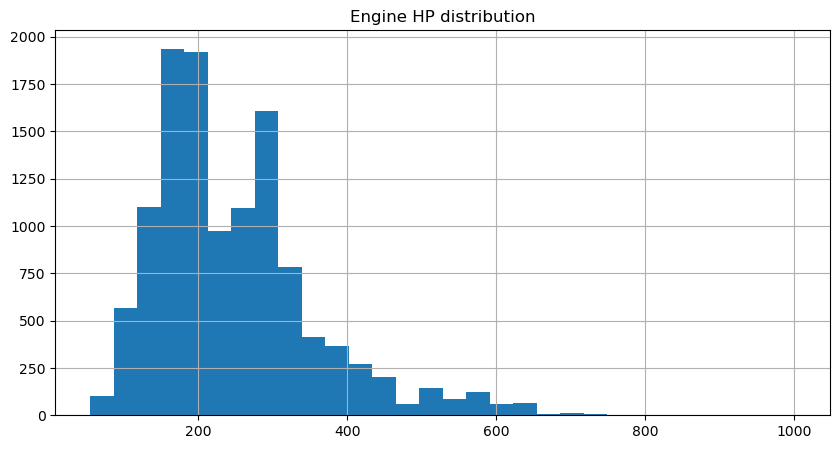

In [10]:
engine = np.array(df['Engine HP'])
engineMean = engine.mean()
print('Среднее значение: ' + str(engineMean))

engineSKO = np.std(engine)
print('СКО: ' + str(engineSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Engine HP'], bins=30);
plt.grid(True)
plt.title('Engine HP distribution')

print('Пропущенные значения: ' + str(df['Engine HP'].isna().sum()))

eOutliers = []

print('Выбросы: ')
print(findOutliers(engine, eOutliers))

Розничная цена MSRP

Среднее значение: 40594.737032063116
СКО: 60106.58092592352
Пропущенные значения: 0
Выбросы: 
[2065902, 1705769, 1500000, 1500000, 1382750, 1380000, 643330, 548800, 548800, 535500, 506500, 497650, 497650, 495000, 495000, 492425, 492000, 490700, 480175, 480000, 479775, 474990, 474600, 470350, 463000, 456500, 455500, 450000, 449525, 443800, 441600, 441600, 440000, 440000, 438325, 433550, 430450, 423500, 418950, 417825, 417000, 412000, 410000, 407400, 405500, 402940, 399500, 397500, 397500, 392400, 382400, 379050, 378200, 375000, 372500, 369200, 366000, 364000, 363000, 359990, 354000, 345400, 340990, 340990, 337000, 336400, 335600, 335000, 334990, 329990, 329990, 329325, 328990, 320695, 320580, 320580, 319995, 319900, 319400, 318990, 315888, 315888, 313088, 313088, 313088, 310543, 310543, 309900, 305650, 304350, 303700, 303700, 303300, 302695, 301695, 299900, 298900, 296387, 296295, 296000, 295987, 295850, 295000, 295000, 295000, 294900, 294080, 294025, 291900, 291744, 290861, 290461, 290

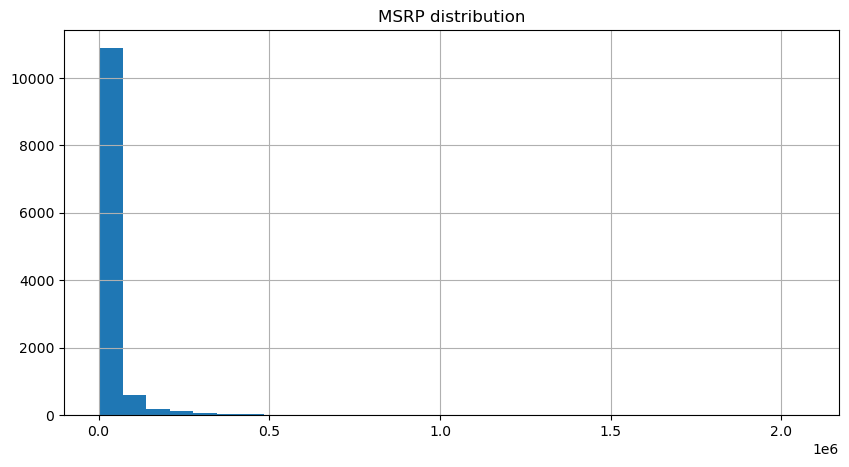

In [12]:
MSRP = np.array(df['MSRP'])
MSRPMean = MSRP.mean()
print('Среднее значение: ' + str(MSRPMean))

MSRPSKO = np.std(MSRP)
print('СКО: ' + str(MSRPSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['MSRP'], bins=30);
plt.grid(True)
plt.title('MSRP distribution')

print('Пропущенные значения: ' + str(df['MSRP'].isna().sum()))

MSRPOutliers = []

print('Выбросы: ')
print(findOutliers(MSRP, MSRPOutliers))

Цилиндры двигателя Engine Cylinders

Среднее значение: 5.617424878294443
СКО: 1.7926678720045384
Пропущенные значения: 0
Выбросы: 
[16.0, 16.0, 16.0]


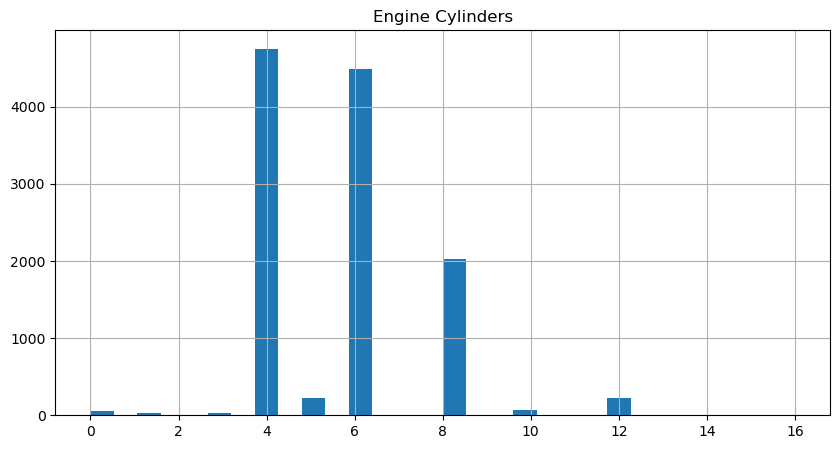

In [14]:
сylin = np.array(df['Engine Cylinders'])
сylinMean = сylin.mean()
print('Среднее значение: ' + str(сylinMean))

сylinSKO = np.std(сylin)
print('СКО: ' + str(сylinSKO))

plt.figure(figsize=(10, 5))
plt.hist(df['Engine Cylinders'], bins=30);
plt.grid(True)
plt.title('Engine Cylinders')

print('Пропущенные значения: ' + str(df['Engine Cylinders'].isna().sum()))

ecOutliers = []

print('Выбросы: ')
print(findOutliers(сylin, ecOutliers))

Зависимость года выпуска и мощности двигателя

Матрица корелляции: 
[[1.         0.34493376]
 [0.34493376 1.        ]]


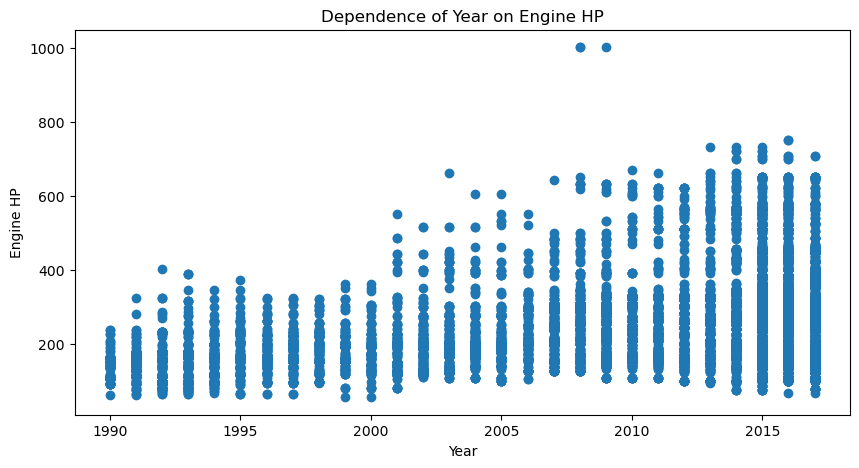

In [16]:
coef1 = np.corrcoef(year, engine)
print('Матрица корелляции: ')
print(coef1)

plt.figure(figsize=(10, 5));
plt.scatter(df['Year'], df['Engine HP']);
plt.xlabel('Year');
plt.ylabel('Engine HP');
plt.title('Dependence of Year on Engine HP');

Зависимость года от расхода топлива в городе

Матрица корелляции: 
[[1.         0.19817071]
 [0.19817071 1.        ]]


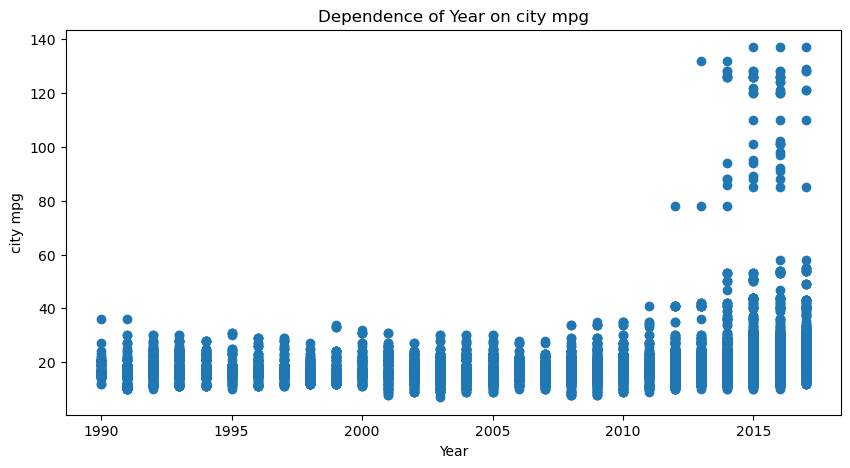

In [18]:
coef2 = np.corrcoef(year, mpg)
print('Матрица корелляции: ')
print(coef2)

plt.figure(figsize=(10, 5));
plt.scatter(df['Year'], df['city mpg']);
plt.xlabel('Year');
plt.ylabel('city mpg');
plt.title('Dependence of Year on city mpg');

Зависимость розничной цены от мощности двигателя

Матрица корелляции: 
[[1.         0.65701346]
 [0.65701346 1.        ]]


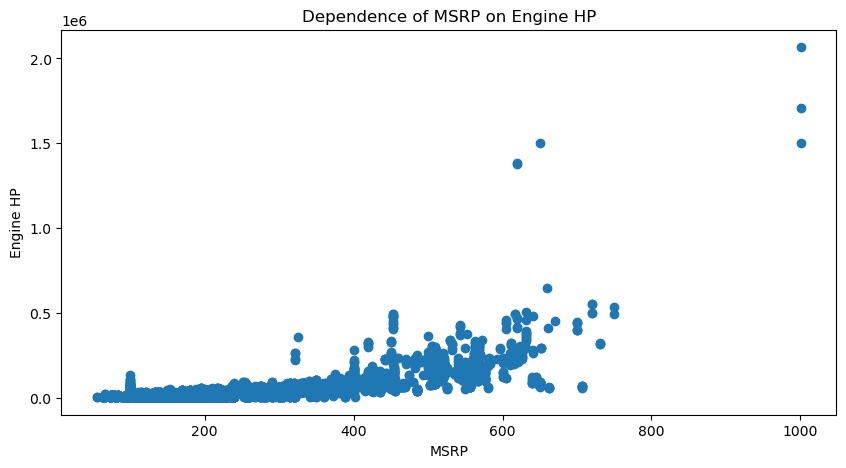

In [20]:
coef3 = np.corrcoef(MSRP, engine)
print('Матрица корелляции: ')
print(coef3)

plt.figure(figsize=(10, 5));
plt.scatter(df['Engine HP'], df['MSRP']);
plt.xlabel('MSRP');
plt.ylabel('Engine HP');
plt.title('Dependence of MSRP on Engine HP');

Зависимость цилиндров от мощности двигателя

Матрица корелляции: 
[[1.         0.77395141]
 [0.77395141 1.        ]]


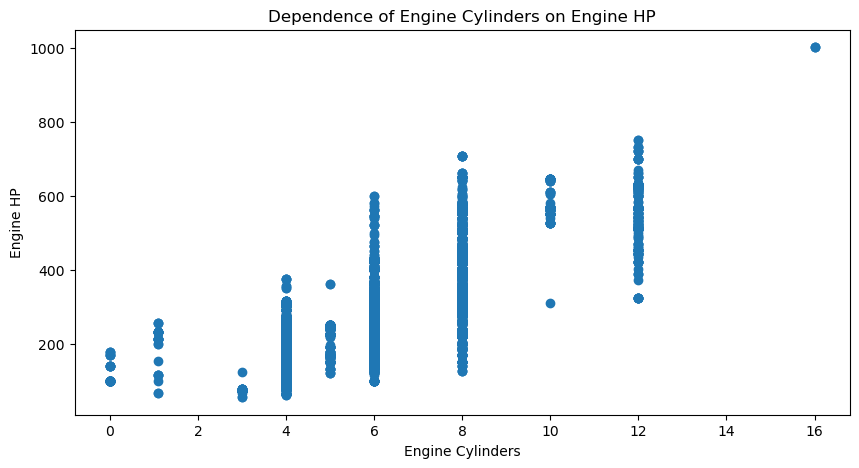

In [22]:
coef4 = np.corrcoef(сylin, engine)
print('Матрица корелляции: ')
print(coef4)

plt.figure(figsize=(10, 5));
plt.scatter(df['Engine Cylinders'], df['Engine HP']);
plt.xlabel('Engine Cylinders');
plt.ylabel('Engine HP');
plt.title('Dependence of Engine Cylinders on Engine HP');